In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree

In [2]:
from sqlalchemy import create_engine
from hold import connection_string

In [3]:
engine = create_engine(f'{connection_string}', encoding='iso-8859-1', connect_args={'connect_timeout': 10})

In [4]:
gtdDF = pd.read_sql_table('global_terrorism', con= engine)

In [5]:
casualties = gtdDF['nkill'] + gtdDF['nwound']
casualties.sum()

554384.0

In [6]:
gtdDF['casualties'] = gtdDF['nkill'] + gtdDF['nwound']
gtdDF.head()

,iyear,imonth,iday,date,country_txt,region_txt,provstate,city,latitude,longitude,...,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,kidhijcountry,ransom,nkill,nwound,index1,casualties
0,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,Firearms,Unknown Gun Type,None,None,None,NaN,0.0,7.0,1.0,7.0
1,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,Firearms,Unknown Gun Type,None,None,None,0.0,0.0,7.0,2.0,7.0
2,2000,1,1,2000-01-01,India,South Asia,Jammu and Kashmir,Udhampur,32.93,75.14,...,Firearms,Unknown Gun Type,None,None,None,NaN,1.0,2.0,3.0,3.0
3,2000,1,1,2000-01-01,Kosovo,Eastern Europe,Kosovo (Province),Peje,42.66,20.31,...,Explosives/Bombs/Dynamite,Unknown Explosive Type,None,None,None,NaN,0.0,1.0,4.0,1.0
4,2000,1,1,2000-01-01,Somalia,Sub-Saharan Africa,Banaadir,Mogadishu,2.11,45.39,...,Firearms,Unknown Gun Type,None,None,None,NaN,6.0,10.0,5.0,16.0


In [7]:
CountryCasualtiesDF = gtdDF[['index1','country_txt','casualties']]
CountryCasualtiesDF.head()

,index1,country_txt,casualties
0,1.0,Namibia,7.0
1,2.0,Namibia,7.0
2,3.0,India,3.0
3,4.0,Kosovo,1.0
4,5.0,Somalia,16.0


In [8]:
CountryCasualties2DF = pd.get_dummies(CountryCasualtiesDF, prefix = '',prefix_sep='')
CountryCasualties2DF.head()

,index1,casualties,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza Strip,Western Sahara,Yemen,Yugoslavia,Zambia,Zimbabwe
0,1.0,7.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,7.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,16.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
CountryCasualtiesMergeDF = result = pd.merge(CountryCasualties2DF,CountryCasualtiesDF[['index1','country_txt']],on='index1')
#RegionCasualtiesMergeDF
CountryCasualtiesMergeDF.head()

,index1,casualties,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,...,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza Strip,Western Sahara,Yemen,Yugoslavia,Zambia,Zimbabwe,country_txt
0,1.0,7.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Namibia
1,2.0,7.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Namibia
2,3.0,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,India
3,4.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Kosovo
4,5.0,16.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Somalia


In [10]:
# Assign X (data) and y (target)
data = CountryCasualtiesMergeDF.drop(["index1","casualties","country_txt"], axis=1)
target = CountryCasualtiesMergeDF["country_txt"]
feature_names = data.columns

print(data.shape, target.shape)

(92700, 164) (92700,)


In [11]:
# Split the data into training and testing
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
### END SOLUTION

In [12]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9996548004314995

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9996548004314995

In [14]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.1700127033042538, 'Iraq'),
 (0.11796070112811476, 'Pakistan'),
 (0.10515514903908636, 'Afghanistan'),
 (0.08364167282784848, 'India'),
 (0.04670300931098753, 'Philippines'),
 (0.039606432255731155, 'Thailand'),
 (0.031061285985621287, 'Yemen'),
 (0.03019381119273891, 'Somalia'),
 (0.028926203380182557, 'Nigeria'),
 (0.02250202131887491, 'Russia'),
 (0.022215059442504823, 'Colombia'),
 (0.021383089775257554, 'Libya'),
 (0.020277813946610962, 'Egypt'),
 (0.018615545596261697, 'Turkey'),
 (0.018354735785295034, 'Ukraine'),
 (0.015857275677883316, 'Syria'),
 (0.015383850399851469, 'Algeria'),
 (0.015146074918806042, 'West Bank and Gaza Strip'),
 (0.013314375394515575, 'Israel'),
 (0.012124551718050675, 'Bangladesh'),
 (0.011910934491927056, 'United Kingdom'),
 (0.011090861371268211, 'Nepal'),
 (0.009331410913071976, 'Sri Lanka'),
 (0.0073710460398250495, 'Lebanon'),
 (0.006814871238820019, 'Sudan'),
 (0.006476085727132163, 'Indonesia'),
 (0.0062342588761602835, 'Greece'),
 (0.006099517

In [19]:
RFCountryDF = pd.DataFrame(sorted(zip(rf.feature_importances_, feature_names), reverse=True), columns = ['Probability', 'Country'])
RFCountryDF.head(10)

,Probability,Country
0,0.170013,Iraq
1,0.117961,Pakistan
2,0.105155,Afghanistan
3,0.083642,India
4,0.046703,Philippines
5,0.039606,Thailand
6,0.031061,Yemen
7,0.030194,Somalia
8,0.028926,Nigeria
9,0.022502,Russia


In [20]:
pies = RFCountryDF['Country'].head(10)
pie_slices = RFCountryDF['Probability'].head(10)
colors = ["lightskyblue","orange","pink","yellowgreen","green","lightcoral","mistyrose",
         "yellow","lightgreen","orchid"]
explode = (0.1,0,0,0,0,0,0,0,0,0)

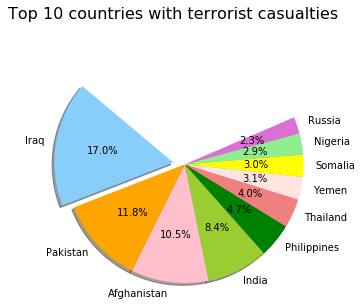

In [21]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_slices, explode=explode, labels=pies, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("../GTA/front_end/static/front_end/assets/visualizations/ML8_Country_Attacks_Pie_RF")
plt.suptitle('Top 10 countries with terrorist casualties', size=16, y=1.12) 
plt.show()